Competencia Kaggle

Modelos y Simulación I Udea2025-2



In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [12]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [13]:
!mv kaggle.json /root/.config/kaggle/kaggle.json

In [14]:
!chmod 600 /root/.config/kaggle/kaggle.json

In [15]:
!kaggle

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: the following arguments are required: command


queda comprobada la configuración de la API key que generó kaggle

Paso 1. Ahora se indica que el servidor debe bajar de kaggle los datasets de la competencia

In [16]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.42GB/s]


# Pantallazo con el zip descargado

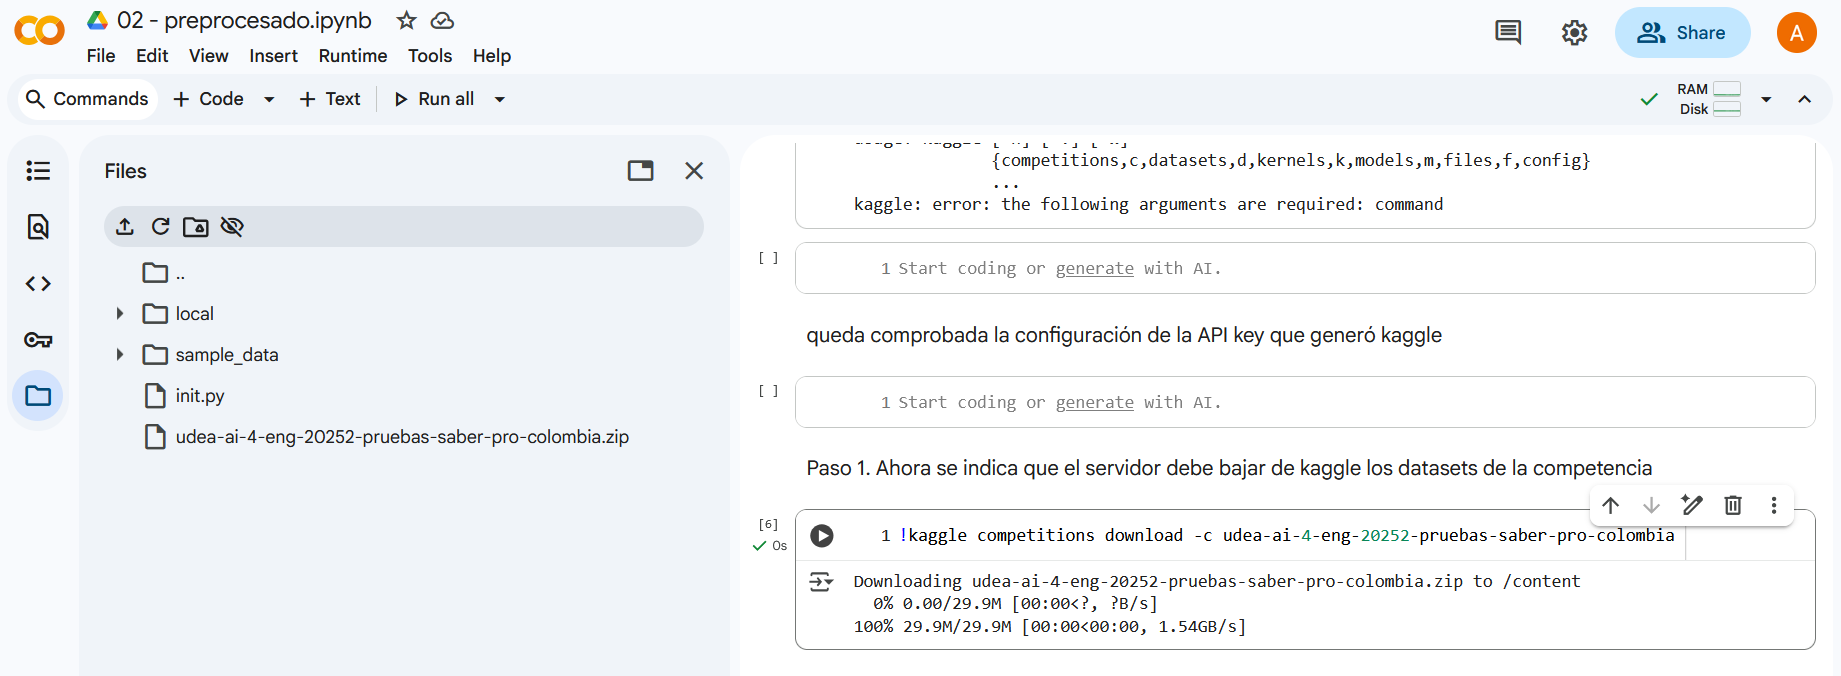

# Descomprimimos los archivos

In [17]:
!unzip -l udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-09-16 01:46   submission_example.csv
 59185238  2025-09-16 01:46   test.csv
143732437  2025-09-16 01:46   train.csv
---------                     -------
207634348                     3 files


In [18]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [19]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Sep 16 01:46 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Sep 16 01:46 test.csv
138M -rw-r--r-- 1 root root 138M Sep 16 01:46 train.csv


# Trabajando con los csv
Ahora que los archivos csv de la competencia ya se encuentran disponibles los podemos cargar con pandas para empezar a trabajar.
Trabajamos con el archivo de train.csv

In [20]:
import pandas as pd

In [21]:
train=pd.read_csv('train.csv')

In [22]:
train.shape

(692500, 21)

In [23]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [24]:
#Verificamos tipos de datos
train.dtypes


,0
ID,int64
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object


In [25]:
#Verificamos valores nulos
train.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [26]:
# porcentaje de nulos por columna (ordenado)
faltantes_df = pd.DataFrame({
    'cantidad_nulos': train.isnull().sum(),
    '%_de_nulos': (train.isnull().mean() * 100).round(3)
}).sort_values('cantidad_nulos', ascending=False)
faltantes_df.head(21) #Existen 21 columnas

,cantidad_nulos,%_de_nulos
F_TIENEAUTOMOVIL,43623,6.299
F_TIENELAVADORA,39773,5.743
F_TIENECOMPUTADOR,38103,5.502
F_ESTRATOVIVIENDA,32137,4.641
E_HORASSEMANATRABAJA,30857,4.456
F_TIENEINTERNET.1,26629,3.845
F_TIENEINTERNET,26629,3.845
F_EDUCACIONMADRE,23664,3.417
F_EDUCACIONPADRE,23178,3.347
E_PAGOMATRICULAPROPIO,6498,0.938


In [27]:
import numpy as np

valor_binario = {'Si':1, 'No':0, np.nan:-1}

train["E_PAGOMATRICULAPROPIO "+'ajustada'] = train["E_PAGOMATRICULAPROPIO"].map(valor_binario)

train["F_TIENELAVADORA"+'ajustada'] = train["F_TIENELAVADORA"].map(valor_binario)
train["F_TIENEINTERNET"+'ajustada'] = train["F_TIENEINTERNET"].map(valor_binario)
train["F_TIENECOMPUTADOR"+'ajustada'] = train["F_TIENECOMPUTADOR"].map(valor_binario)
train["F_TIENEAUTOMOVIL"+'ajustada'] = train["F_TIENEAUTOMOVIL"].map(valor_binario)

In [28]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PAGOMATRICULAPROPIO ajustada,F_TIENELAVADORAajustada,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,medio-alto,0.322,0.208,0.310,0.267,0,1,1,1,1
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,bajo,0.311,0.215,0.292,0.264,0,1,0,1,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,bajo,0.297,0.214,0.305,0.264,0,1,1,0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,alto,0.485,0.172,0.252,0.190,0,1,1,1,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,medio-alto,0.237,0.271,0.271,0.311,1,1,1,1,0
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,bajo,0.314,0.240,0.278,0.260,0,1,1,1,0
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,medio-bajo,0.286,0.240,0.314,0.287,1,1,1,1,0
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,bajo,0.132,0.426,0.261,0.328,1,0,0,1,0


In [29]:
train["E_VALORMATRICULAUNIVERSIDAD"].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [30]:
import unicodedata
# 1) función de normalización de strings
def normalizar_string(s):
    if pd.isna(s):
        return ""
    s = str(s).strip().lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')
    return s

# 2) mapping propuesto (punto medio)
mat_map = {
    np.nan:-1,
    'menos de 500 mil': 250000,
    'entre 500 mil y menos de 1 millon': 750000,
    'entre 1 millon y menos de 2.5 millones': 1750000,
    'entre 2.5 millones y menos de 4 millones': 3250000,
    'entre 4 millones y menos de 5.5 millones': 4750000,
    'entre 5.5 millones y menos de 7 millones': 6250000,
    'mas de 7 millones': 7500000,
    'no pago matricula': 0,
}

# normalizar claves del mapping para asegurar coincidencia
mat_map_norm = { normalizar_string(k): v for k, v in mat_map.items() }

# 3) aplicar mapping de forma segura
orig = train["E_VALORMATRICULAUNIVERSIDAD"]  # serie original
orig_norm = orig.fillna("").astype(str).apply(normalizar_string)

mapped = orig_norm.map(mat_map_norm)  # valores numéricos o NaN si no hay mapping

# 4 crear columnas nuevas en df
train['valor_matricula_num'] = mapped

In [31]:
train['valor_matricula_num'].unique()

array([6250000, 3250000, 4750000, 7500000, 1750000,  750000,  250000,
             0,      -1])

In [32]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PAGOMATRICULAPROPIO ajustada,F_TIENELAVADORAajustada,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada,valor_matricula_num
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,0.322,0.208,0.310,0.267,0,1,1,1,1,6250000
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,0.311,0.215,0.292,0.264,0,1,0,1,0,3250000
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0.297,0.214,0.305,0.264,0,1,1,0,0,3250000
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,0.485,0.172,0.252,0.190,0,1,1,1,0,4750000
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,0.316,0.232,0.285,0.294,0,1,1,1,1,3250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,0.237,0.271,0.271,0.311,1,1,1,1,0,750000
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,0.314,0.240,0.278,0.260,0,1,1,1,0,3250000
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0.286,0.240,0.314,0.287,1,1,1,1,0,1750000
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,0.132,0.426,0.261,0.328,1,0,0,1,0,3250000


In [33]:
#Ajuste de la columna de horas de trabajo a la semana
# mapping propuesto (usar claves normalizadas)
hours_map = {
    np.nan:-1,
    '0': 0,
    'menos de 10 horas': 5,
    'entre 11 y 20 horas': 15,
    'entre 21 y 30 horas': 25,
    'mas de 30 horas': 35,
}
hours_map_norm = { normalizar_string(k): v for k, v in hours_map.items() }

# preparar la serie original y su versión normalizada
orig = train["E_HORASSEMANATRABAJA"]
orig_norm = orig.fillna("").astype(str).apply(normalizar_string)

# mapear de forma segura
mapped = orig_norm.map(hours_map_norm)

# crear columna mapeada
train['horas_trabajo_num'] = mapped

In [34]:
train['horas_trabajo_num'].unique()

array([ 5,  0, 35, 25, 15, -1])

In [35]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PAGOMATRICULAPROPIO ajustada,F_TIENELAVADORAajustada,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada,valor_matricula_num,horas_trabajo_num
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,0.208,0.310,0.267,0,1,1,1,1,6250000,5
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,0.215,0.292,0.264,0,1,0,1,0,3250000,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0.214,0.305,0.264,0,1,1,0,0,3250000,35
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,0.172,0.252,0.190,0,1,1,1,0,4750000,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,0.232,0.285,0.294,0,1,1,1,1,3250000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,0.271,0.271,0.311,1,1,1,1,0,750000,15
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,0.240,0.278,0.260,0,1,1,1,0,3250000,35
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0.240,0.314,0.287,1,1,1,1,0,1750000,5
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,0.426,0.261,0.328,1,0,0,1,0,3250000,5


In [36]:
train["F_EDUCACIONPADRE"].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [37]:
# Normalizar strings mínimos (quita espacios y uniforma case)
def norm(s):
    if pd.isna(s):
        return s
    return str(s).strip()

train['F_EDUCACIONPADRE_raw'] = train['F_EDUCACIONPADRE'].map(norm)

# Tratamiento preliminar de valores especiales: opcionalmente convertir a NaN
train['F_EDUCACIONPADRE_clean'] = train['F_EDUCACIONPADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})

# Definir orden de importancia en nivel educativo
education_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

# Map a ordinal (int) - dejamos NaN donde no aplicó o desconocido
map_dict = {k: i for i, k in enumerate(education_order)}
train['F_EDUCACIONPADRE_ord'] = train['F_EDUCACIONPADRE_clean'].map(map_dict)

# Flag de missing (antes o después de imputar)
train['F_EDUCACIONPADRE_missing'] = train['F_EDUCACIONPADRE_ord'].isna().astype(int)

# Imputación placeholder: rellenar con -1 (o con la mediana calculada en train)
train['F_EDUCACIONPADRE_ord_filled'] = train['F_EDUCACIONPADRE_ord'].fillna(-1).astype(int)

In [38]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada,valor_matricula_num,horas_trabajo_num,F_EDUCACIONPADRE_raw,F_EDUCACIONPADRE_clean,F_EDUCACIONPADRE_ord,F_EDUCACIONPADRE_missing,F_EDUCACIONPADRE_ord_filled
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,1,1,1,6250000,5,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,5.0,0,5
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,0,1,0,3250000,0,Técnica o tecnológica completa,Técnica o tecnológica completa,6.0,0,6
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,1,0,0,3250000,35,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,1,1,0,4750000,0,No sabe,NaN,NaN,1,-1
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,1,1,1,3250000,25,Primaria completa,Primaria completa,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,1,1,0,750000,15,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,1,1,0,3250000,35,Primaria incompleta,Primaria incompleta,1.0,0,1
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,1,1,0,1750000,5,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,0,1,0,3250000,5,Primaria completa,Primaria completa,2.0,0,2


In [39]:
#Columna Educación madre
# Normalizar strings mínimos (quita espacios y uniforma case)
def norm(s):
    if pd.isna(s):
        return s
    return str(s).strip()

train['F_EDUCACIONMADRE_raw'] = train['F_EDUCACIONMADRE'].map(norm)

# Tratamiento preliminar de valores especiales: opcionalmente convertir a NaN
train['F_EDUCACIONMADRE_clean'] = train['F_EDUCACIONMADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})

# Definir orden de importancia en nivel educativo
education_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

# Map a ordinal (int) - dejamos NaN donde no aplicó o desconocido
map_dict = {k: i for i, k in enumerate(education_order)}
train['F_EDUCACIONMADRE_ord'] = train['F_EDUCACIONMADRE_clean'].map(map_dict)

# Flag de missing (antes o después de imputar)
train['F_EDUCACIONMADRE_missing'] = train['F_EDUCACIONMADRE_ord'].isna().astype(int)

# Imputación placeholder: rellenar con -1 (o con la mediana calculada en train)
train['F_EDUCACIONMADRE_ord_filled'] = train['F_EDUCACIONMADRE_ord'].fillna(-1).astype(int)

In [40]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,F_EDUCACIONPADRE_raw,F_EDUCACIONPADRE_clean,F_EDUCACIONPADRE_ord,F_EDUCACIONPADRE_missing,F_EDUCACIONPADRE_ord_filled,F_EDUCACIONMADRE_raw,F_EDUCACIONMADRE_clean,F_EDUCACIONMADRE_ord,F_EDUCACIONMADRE_missing,F_EDUCACIONMADRE_ord_filled
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,5.0,0,5,Postgrado,Postgrado,9.0,0,9
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,Técnica o tecnológica completa,Técnica o tecnológica completa,6.0,0,6,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,5.0,0,5
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,No sabe,NaN,NaN,1,-1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,Primaria completa,Primaria completa,2.0,0,2,Primaria completa,Primaria completa,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,Primaria incompleta,Primaria incompleta,1.0,0,1,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,Primaria completa,Primaria completa,2.0,0,2,Primaria completa,Primaria completa,2.0,0,2


In [41]:
train["F_ESTRATOVIVIENDA"].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [42]:
train["F_ESTRATOVIVIENDA"].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [43]:
import re


def parse_estrato(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s.lower() == 'sin estrato':
        return 0  # decide 0 para "Sin Estrato"; puedes cambiar a np.nan si prefieres
    m = re.search(r'(\d+)', s)
    if m:
        return int(m.group(1))
    return np.nan

train["F_ESTRATOVIVIENDA" + "_num"] = train["F_ESTRATOVIVIENDA"].map(parse_estrato)

# Flag de faltantes
train["F_ESTRATOVIVIENDA" + "_missing"] = train["F_ESTRATOVIVIENDA" + "_num"].isna().astype(int)

# Imputación rápida para EDA: rellenar NaN con -1
train["F_ESTRATOVIVIENDA" + "_filled_minus1"] = train["F_ESTRATOVIVIENDA" + "_num"].fillna(-1).astype(int)

In [44]:
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,F_EDUCACIONPADRE_missing,F_EDUCACIONPADRE_ord_filled,F_EDUCACIONMADRE_raw,F_EDUCACIONMADRE_clean,F_EDUCACIONMADRE_ord,F_EDUCACIONMADRE_missing,F_EDUCACIONMADRE_ord_filled,F_ESTRATOVIVIENDA_num,F_ESTRATOVIVIENDA_missing,F_ESTRATOVIVIENDA_filled_minus1
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,0,5,Postgrado,Postgrado,9.0,0,9,3.0,0,3
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,0,6,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,5.0,0,5,3.0,0,3
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0,4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4,3.0,0,3
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,1,-1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,4.0,0,4,4.0,0,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,0,2,Primaria completa,Primaria completa,2.0,0,2,3.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,0,4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3,2.0,0,2
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,0,1,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3,3.0,0,3
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,0,4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,3.0,0,3,3.0,0,3
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,0,2,Primaria completa,Primaria completa,2.0,0,2,1.0,0,1


In [45]:
train.columns

Index(['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD',
       'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4', 'E_PAGOMATRICULAPROPIO ajustada',
       'F_TIENELAVADORAajustada', 'F_TIENEINTERNETajustada',
       'F_TIENECOMPUTADORajustada', 'F_TIENEAUTOMOVILajustada',
       'valor_matricula_num', 'horas_trabajo_num', 'F_EDUCACIONPADRE_raw',
       'F_EDUCACIONPADRE_clean', 'F_EDUCACIONPADRE_ord',
       'F_EDUCACIONPADRE_missing', 'F_EDUCACIONPADRE_ord_filled',
       'F_EDUCACIONMADRE_raw', 'F_EDUCACIONMADRE_clean',
       'F_EDUCACIONMADRE_ord', 'F_EDUCACIONMADRE_missing',
       'F_EDUCACIONMADRE_ord_filled', 'F_ESTRATOVIVIENDA_num',


In [46]:
order = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
mapping = {lab: i for i, lab in enumerate(order)}

train['RENDIMIENTO_ORD'] = train['RENDIMIENTO_GLOBAL'].map(mapping)

selected_columns = [
    'INDICADOR_1',
    'INDICADOR_2',
    'INDICADOR_3',
    'INDICADOR_4',
    'RENDIMIENTO_ORD',
    'E_PAGOMATRICULAPROPIO ajustada',
    'F_TIENELAVADORAajustada',
    'F_TIENEINTERNETajustada',
    'F_TIENECOMPUTADORajustada',
    'F_TIENEAUTOMOVILajustada',
    'valor_matricula_num',
    'horas_trabajo_num',
    'F_ESTRATOVIVIENDA_filled_minus1',
    'F_EDUCACIONMADRE_ord_filled',
    'F_EDUCACIONPADRE_ord_filled'
]

train_selected = train[selected_columns]

In [47]:
train_selected

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,RENDIMIENTO_ORD,E_PAGOMATRICULAPROPIO ajustada,F_TIENELAVADORAajustada,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada,valor_matricula_num,horas_trabajo_num,F_ESTRATOVIVIENDA_filled_minus1,F_EDUCACIONMADRE_ord_filled,F_EDUCACIONPADRE_ord_filled
0,0.322,0.208,0.310,0.267,2,0,1,1,1,1,6250000,5,3,9,5
1,0.311,0.215,0.292,0.264,0,0,1,0,1,0,3250000,0,3,5,6
2,0.297,0.214,0.305,0.264,0,0,1,1,0,0,3250000,35,3,4,4
3,0.485,0.172,0.252,0.190,3,0,1,1,1,0,4750000,0,4,4,-1
4,0.316,0.232,0.285,0.294,1,0,1,1,1,1,3250000,25,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.237,0.271,0.271,0.311,2,1,1,1,1,0,750000,15,2,3,4
692496,0.314,0.240,0.278,0.260,0,0,1,1,1,0,3250000,35,3,3,1
692497,0.286,0.240,0.314,0.287,1,1,1,1,1,0,1750000,5,3,3,4
692498,0.132,0.426,0.261,0.328,0,1,0,0,1,0,3250000,5,1,2,2


In [48]:
train_selected["RENDIMIENTO_ORD"].unique()

array([2, 0, 3, 1])

In [ ]:
# This cell is now empty as its content has been moved to the previous cell.

In [49]:
train_selected["INDICADOR_4"].unique()

array([0.267, 0.264, 0.19 , 0.294, 0.175, 0.308, 0.29 , 0.328, 0.167,
       0.292, 0.324, 0.289, 0.287, 0.266, 0.258, 0.282, 0.314, 0.295,
       0.301, 0.026, 0.304, 0.307, 0.283, 0.023, 0.248, 0.32 , 0.28 ,
       0.302, 0.286, 0.195, 0.278, 0.198, 0.319, 0.316, 0.222, 0.311,
       0.277, 0.253, 0.256, 0.273, 0.012, 0.296, 0.144, 0.209, 0.293,
       0.322, 0.029, 0.323, 0.176, 0.048, 0.265, 0.299, 0.251, 0.006,
       0.285, 0.045, 0.326, 0.227, 0.325, 0.291, 0.288, 0.281, 0.268,
       0.305, 0.298, 0.318, 0.261, 0.18 , 0.211, 0.191, 0.276, 0.284,
       0.271, 0.005, 0.269, 0.297, 0.218, 0.303, 0.317, 0.184, 0.182,
       0.306, 0.201, 0.259, 0.321, 0.179, 0.313, 0.247, 0.252, 0.146,
       0.272, 0.315, 0.263, 0.257, 0.204, 0.312, 0.255, 0.228, 0.27 ,
       0.25 , 0.3  , 0.205, 0.039, 0.202, 0.044, 0.189, 0.164, 0.203,
       0.122, 0.135, 0.329, 0.197, 0.332, 0.011, 0.214, 0.12 , 0.157,
       0.007, 0.035, 0.185, 0.31 , 0.01 , 0.004, 0.262, 0.194, 0.05 ,
       0.173, 0.108,

In [50]:
train_selected

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,RENDIMIENTO_ORD,E_PAGOMATRICULAPROPIO ajustada,F_TIENELAVADORAajustada,F_TIENEINTERNETajustada,F_TIENECOMPUTADORajustada,F_TIENEAUTOMOVILajustada,valor_matricula_num,horas_trabajo_num,F_ESTRATOVIVIENDA_filled_minus1,F_EDUCACIONMADRE_ord_filled,F_EDUCACIONPADRE_ord_filled
0,0.322,0.208,0.310,0.267,2,0,1,1,1,1,6250000,5,3,9,5
1,0.311,0.215,0.292,0.264,0,0,1,0,1,0,3250000,0,3,5,6
2,0.297,0.214,0.305,0.264,0,0,1,1,0,0,3250000,35,3,4,4
3,0.485,0.172,0.252,0.190,3,0,1,1,1,0,4750000,0,4,4,-1
4,0.316,0.232,0.285,0.294,1,0,1,1,1,1,3250000,25,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.237,0.271,0.271,0.311,2,1,1,1,1,0,750000,15,2,3,4
692496,0.314,0.240,0.278,0.260,0,0,1,1,1,0,3250000,35,3,3,1
692497,0.286,0.240,0.314,0.287,1,1,1,1,1,0,1750000,5,3,3,4
692498,0.132,0.426,0.261,0.328,0,1,0,0,1,0,3250000,5,1,2,2


In [51]:
# Renombrar columnas
train_selected = train_selected.rename(columns={
    "RENDIMIENTO_ORD":"RENDIMIENTO",
    'E_PAGOMATRICULAPROPIO ajustada': 'PAGO_MATRICULA_PROPIO',
    'F_TIENELAVADORAajustada': 'TIENE_LAVADORA',
    'F_TIENEINTERNETajustada': 'TIENE_INTERNET',
    'F_TIENECOMPUTADORajustada': 'TIENE_COMPUTADOR',
    'F_TIENEAUTOMOVILajustada': 'TIENE_AUTOMOVIL',
    'valor_matricula_num': 'VALOR_MATRICULA',
    'horas_trabajo_num': 'HORAS_TRABAJO',
    'F_ESTRATOVIVIENDA_filled_minus1': 'ESTRATO_VIVIENDA',
    'F_EDUCACIONMADRE_ord_filled': 'EDUCACION_MADRE',
    'F_EDUCACIONPADRE_ord_filled': 'EDUCACION_PADRE'
})


In [52]:
train_selected

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,RENDIMIENTO,PAGO_MATRICULA_PROPIO,TIENE_LAVADORA,TIENE_INTERNET,TIENE_COMPUTADOR,TIENE_AUTOMOVIL,VALOR_MATRICULA,HORAS_TRABAJO,ESTRATO_VIVIENDA,EDUCACION_MADRE,EDUCACION_PADRE
0,0.322,0.208,0.310,0.267,2,0,1,1,1,1,6250000,5,3,9,5
1,0.311,0.215,0.292,0.264,0,0,1,0,1,0,3250000,0,3,5,6
2,0.297,0.214,0.305,0.264,0,0,1,1,0,0,3250000,35,3,4,4
3,0.485,0.172,0.252,0.190,3,0,1,1,1,0,4750000,0,4,4,-1
4,0.316,0.232,0.285,0.294,1,0,1,1,1,1,3250000,25,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.237,0.271,0.271,0.311,2,1,1,1,1,0,750000,15,2,3,4
692496,0.314,0.240,0.278,0.260,0,0,1,1,1,0,3250000,35,3,3,1
692497,0.286,0.240,0.314,0.287,1,1,1,1,1,0,1750000,5,3,3,4
692498,0.132,0.426,0.261,0.328,0,1,0,0,1,0,3250000,5,1,2,2


In [53]:
from sklearn.model_selection import train_test_split


# Definir X y y
X = train_selected.drop(columns=['RENDIMIENTO'])
y = train_selected['RENDIMIENTO'].astype(int)   # asegurar int

# Stratified split 70% train / 30% test
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=RANDOM_STATE
)

# Reconstruir dataframes con la columna target de nuevo
train_df = X_train.copy()
train_df['RENDIMIENTO'] = y_train
test_df = X_test.copy()
test_df['RENDIMIENTO'] = y_test

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

Train shape: (484750, 15)
Test shape : (207750, 15)


#PREPROCESAMIENTO LISTO

In [ ]:
train_df

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,PAGO_MATRICULA_PROPIO,TIENE_LAVADORA,TIENE_INTERNET,TIENE_COMPUTADOR,TIENE_AUTOMOVIL,VALOR_MATRICULA,HORAS_TRABAJO,ESTRATO_VIVIENDA,EDUCACION_MADRE,EDUCACION_PADRE,RENDIMIENTO
353575,0.201,0.289,0.296,0.278,1,0,0,1,0,3250000,25,2,4,8,3
163934,0.168,0.390,0.260,0.297,1,1,1,1,0,4750000,15,1,0,0,1
97492,0.627,0.102,0.233,0.127,0,1,1,1,1,7500000,35,6,8,9,3
199347,0.467,0.156,0.253,0.200,1,1,1,1,1,4750000,15,4,8,8,1
201793,0.556,0.122,0.229,0.144,0,1,1,1,1,7500000,35,5,8,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496160,0.243,0.313,0.263,0.279,1,0,1,1,1,3250000,35,2,1,2,2
605175,0.439,0.183,0.281,0.215,1,1,1,1,1,1750000,0,4,4,4,1
569060,0.223,0.279,0.268,0.323,1,1,1,1,0,750000,15,2,8,7,2
168951,0.210,0.299,0.298,0.297,1,0,1,0,0,250000,15,2,2,6,0


In [ ]:
test_df

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,PAGO_MATRICULA_PROPIO,TIENE_LAVADORA,TIENE_INTERNET,TIENE_COMPUTADOR,TIENE_AUTOMOVIL,VALOR_MATRICULA,HORAS_TRABAJO,ESTRATO_VIVIENDA,EDUCACION_MADRE,EDUCACION_PADRE,RENDIMIENTO
686905,0.313,0.249,0.292,0.255,0,0,1,1,0,1750000,35,3,4,4,1
644267,0.231,0.291,0.272,0.308,0,1,1,1,0,4750000,35,2,8,4,0
290312,0.289,0.223,0.289,0.266,1,1,1,0,0,6250000,25,3,2,1,1
553,0.466,0.184,0.289,0.227,0,1,1,1,1,6250000,15,4,3,3,2
534869,0.224,0.319,0.293,0.307,0,1,1,0,0,3250000,15,2,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487389,0.288,0.230,0.316,0.276,0,1,1,1,0,1750000,25,3,8,6,1
21089,0.169,0.424,0.226,0.309,0,1,0,1,0,1750000,5,1,1,4,0
239346,0.211,0.314,0.294,0.285,0,1,1,1,0,3250000,0,2,6,2,1
148470,0.308,0.250,0.301,0.248,1,1,1,1,1,1750000,35,3,5,7,3


#CUARTO MODELO: CatBoost Classifier Model



In [65]:
!pip install catboost
print("CatBoost library installation initiated.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.6 MB/s eta 0:00:00
CatBoost library installation initiated.


In [ ]:
import pandas as pd
import numpy as np
import unicodedata
import re
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder


train = pd.read_csv('train.csv')

valor_binario = {'Si':1, 'No':0, np.nan:-1}

train["PAGO_MATRICULA_PROPIO"] = train["E_PAGOMATRICULAPROPIO"].map(valor_binario)
train["TIENE_LAVADORA"] = train["F_TIENELAVADORA"].map(valor_binario)
train["TIENE_INTERNET"] = train["F_TIENEINTERNET"].map(valor_binario)
train["TIENE_COMPUTADOR"] = train["F_TIENECOMPUTADOR"].map(valor_binario)
train["TIENE_AUTOMOVIL"] = train["F_TIENEAUTOMOVIL"].map(valor_binario)

# E_VALORMATRICULAUNIVERSIDAD mapping
def normalizar_string(s):
    if pd.isna(s):
        return ""
    s = str(s).strip().lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')
    return s

mat_map = {
    np.nan:-1,
    'menos de 500 mil': 250000,
    'entre 500 mil y menos de 1 millon': 750000,
    'entre 1 millon y menos de 2.5 millones': 1750000,
    'entre 2.5 millones y menos de 4 millones': 3250000,
    'entre 4 millones y menos de 5.5 millones': 4750000,
    'entre 5.5 millones y menos de 7 millones': 6250000,
    'mas de 7 millones': 7500000,
    'no pago matricula': 0,
}
mat_map_norm = { normalizar_string(k): v for k, v in mat_map.items() }

orig_val_mat = train["E_VALORMATRICULAUNIVERSIDAD"]
orig_norm_val_mat = orig_val_mat.fillna("").astype(str).apply(normalizar_string)
train['VALOR_MATRICULA'] = orig_norm_val_mat.map(mat_map_norm)

# E_HORASSEMANATRABAJA mapping
hours_map = {
    np.nan:-1,
    '0': 0,
    'menos de 10 horas': 5,
    'entre 11 y 20 horas': 15,
    'entre 21 y 30 horas': 25,
    'mas de 30 horas': 35,
}
hours_map_norm = { normalizar_string(k): v for k, v in hours_map.items() }

orig_hours = train["E_HORASSEMANATRABAJA"]
orig_norm_hours = orig_hours.fillna("").astype(str).apply(normalizar_string)
train['HORAS_TRABAJO'] = orig_norm_hours.map(hours_map_norm)

# F_EDUCACIONPADRE mapping
def norm(s):
    if pd.isna(s):
        return s
    return str(s).strip()

education_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]
map_dict = {k: i for i, k in enumerate(education_order)}

train['F_EDUCACIONPADRE_raw'] = train['F_EDUCACIONPADRE'].map(norm)
train['F_EDUCACIONPADRE_clean'] = train['F_EDUCACIONPADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})
train['EDUCACION_PADRE'] = train['F_EDUCACIONPADRE_clean'].map(map_dict).fillna(-1).astype(int) # Fillna here directly

# F_EDUCACIONMADRE mapping
train['F_EDUCACIONMADRE_raw'] = train['F_EDUCACIONMADRE'].map(norm)
train['F_EDUCACIONMADRE_clean'] = train['F_EDUCACIONMADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})
train['EDUCACION_MADRE'] = train['F_EDUCACIONMADRE_clean'].map(map_dict).fillna(-1).astype(int) # Fillna here directly

# F_ESTRATOVIVIENDA mapping
def parse_estrato(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s.lower() == 'sin estrato':
        return 0  # decide 0 para "Sin Estrato"; puedes cambiar a np.nan si prefieres
    m = re.search(r'(\d+)', s)
    if m:
        return int(m.group(1))
    return np.nan

train["ESTRATO_VIVIENDA"] = train["F_ESTRATOVIVIENDA"].map(parse_estrato).fillna(-1).astype(int) # Fillna here directly

# Target encoding
order = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
mapping = {lab: i for i, lab in enumerate(order)}
train['RENDIMIENTO'] = train['RENDIMIENTO_GLOBAL'].map(mapping)

#Procesado a los datos de test
test_df_raw_le = pd.read_csv('test.csv')


test_df_raw_le["PAGO_MATRICULA_PROPIO"] = test_df_raw_le["E_PAGOMATRICULAPROPIO"].map(valor_binario)
test_df_raw_le["TIENE_LAVADORA"] = test_df_raw_le["F_TIENELAVADORA"].map(valor_binario)
test_df_raw_le["TIENE_INTERNET"] = test_df_raw_le["F_TIENEINTERNET"].map(valor_binario)
test_df_raw_le["TIENE_COMPUTADOR"] = test_df_raw_le["F_TIENECOMPUTADOR"].map(valor_binario)
test_df_raw_le["TIENE_AUTOMOVIL"] = test_df_raw_le["F_TIENEAUTOMOVIL"].map(valor_binario)

orig_val_mat_test = test_df_raw_le["E_VALORMATRICULAUNIVERSIDAD"]
orig_norm_val_mat_test = orig_val_mat_test.fillna("").astype(str).apply(normalizar_string)
test_df_raw_le['VALOR_MATRICULA'] = orig_norm_val_mat_test.map(mat_map_norm)

orig_hours_test = test_df_raw_le["E_HORASSEMANATRABAJA"]
orig_norm_hours_test = orig_hours_test.fillna("").astype(str).apply(normalizar_string)
test_df_raw_le['HORAS_TRABAJO'] = orig_norm_hours_test.map(hours_map_norm)

test_df_raw_le['F_EDUCACIONPADRE_raw'] = test_df_raw_le['F_EDUCACIONPADRE'].map(norm)
test_df_raw_le['F_EDUCACIONPADRE_clean'] = test_df_raw_le['F_EDUCACIONPADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})
test_df_raw_le['EDUCACION_PADRE'] = test_df_raw_le['F_EDUCACIONPADRE_clean'].map(map_dict).fillna(-1).astype(int)

test_df_raw_le['F_EDUCACIONMADRE_raw'] = test_df_raw_le['F_EDUCACIONMADRE'].map(norm)
test_df_raw_le['F_EDUCACIONMADRE_clean'] = test_df_raw_le['F_EDUCACIONMADRE_raw'].replace({
    'No sabe': np.nan,
    'No Aplica': np.nan
})
test_df_raw_le['EDUCACION_MADRE'] = test_df_raw_le['F_EDUCACIONMADRE_clean'].map(map_dict).fillna(-1).astype(int)

test_df_raw_le["ESTRATO_VIVIENDA"] = test_df_raw_le["F_ESTRATOVIVIENDA"].map(parse_estrato).fillna(-1).astype(int)

categorical_cols_le = ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_PRIVADO_LIBERTAD', 'F_TIENEINTERNET.1']

# Se aplica label encoding
for col in categorical_cols_le:
    le = LabelEncoder()
    # tratando datos nulos o vacíos
    train[col] = train[col].astype(str).replace('nan', np.nan) # Ensure string 'nan' becomes actual np.nan for consistency
    test_df_raw_le[col] = test_df_raw_le[col].astype(str).replace('nan', np.nan)

    all_unique_values = pd.concat([train[col], test_df_raw_le[col]], axis=0).unique()
    le.fit(all_unique_values[pd.notna(all_unique_values)]) # Fit only on non-NaN values

    train[col] = train[col].apply(lambda x: le.transform([x])[0] if pd.notna(x) else -1)
    test_df_raw_le[col] = test_df_raw_le[col].apply(lambda x: le.transform([x])[0] if pd.notna(x) else -1)

selected_columns_le = [
    'INDICADOR_1',
    'INDICADOR_2',
    'INDICADOR_3',
    'INDICADOR_4',
    'PAGO_MATRICULA_PROPIO',
    'TIENE_LAVADORA',
    'TIENE_INTERNET',
    'TIENE_COMPUTADOR',
    'TIENE_AUTOMOVIL',
    'VALOR_MATRICULA',
    'HORAS_TRABAJO',
    'ESTRATO_VIVIENDA',
    'EDUCACION_MADRE',
    'EDUCACION_PADRE',
    'E_PRGM_ACADEMICO',
    'E_PRGM_DEPARTAMENTO',
    'E_PRIVADO_LIBERTAD',
    'F_TIENEINTERNET.1'
]

X_train = train[selected_columns_le]
y_train = train['RENDIMIENTO'].astype(int)
test_df_le = test_df_raw_le[selected_columns_le]

# Entrenamiento del modelo catboost
RANDOM_STATE = 42

catboost_classifier = CatBoostClassifier(
    random_state=RANDOM_STATE,
    n_estimators=100,
    verbose=0,
    thread_count=-1
)

# Train the model
print("Entrenando el modelo...")
catboost_classifier.fit(X_train, y_train)

print("Modelo entrenado")

predictions_numeric = catboost_classifier.predict(test_df_le)

# Se hace la preparación de los datos del submision
inverse_mapping = {v: k for k, v in mapping.items()}
predictions_categorical = pd.Series(predictions_numeric.flatten()).map(inverse_mapping)

submission_df = pd.DataFrame({'ID': test_df_raw_le['ID'], 'RENDIMIENTO_GLOBAL': predictions_categorical})

# Se genera en colab el submission
submission_df.to_csv('submission.csv', index=False)

print("'submission.csv' generado usando catboost")
print(f"forma de los datos de entrenamiento: {X_train.shape}")
print(f"forma de los datos de test {test_df_le.shape}")